# 1. Initialisation 

In [1]:
# import libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# 2. Wrangling

In [2]:
#read pollen count dataset
pollen = pd.read_csv("pollen_data_2009_2011.csv")
pollen.head()

,week_number,plantago_pollen_week_count_grains_metre_cubed,pinus_pollen_week_count_grains_metre_cubed,rumex_pollen_week_count_grains_metre_cubed,location,chenopodiaceae_pollen_week_count_grains_metre_cubed,first_date_of_week,urticaceae_pollen_week_count_grains_metre_cubed,north,oleaceae_pollen_week_count_grains_metre_cubed,...,myrtaceae_pollen_week_count_grains_metre_cubed,ogc_fid,alnus_pollen_week_count_grains_metre_cubed,asteraceae_pollen_week_count_grains_metre_cubed,casuarina_pollen_week_count_grains_metre_cubed,quercus_pollen_week_count_grains_metre_cubed,acacia_pollen_week_count_grains_metre_cubed,east,num_days_data_collected,ulmus_pollen_week_count_grains_metre_cubed
0,35,NaN,5.1,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-08-31T00:00:00.000+0000,NaN,-37.797103,132.6,...,23.8,1,11.9,5.1,NaN,163.2,5.1,144.964841,6,8.5
1,36,1.7,15.3,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-09-07T00:00:00.000+0000,NaN,-37.797103,452.2,...,166.6,2,51.0,8.5,NaN,351.9,18.7,144.964841,7,11.9
2,37,6.8,17.0,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-09-14T00:00:00.000+0000,8.5,-37.797103,363.8,...,85.0,3,173.4,6.8,3.4,343.4,5.1,144.964841,7,10.2
3,38,6.8,11.9,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-09-21T00:00:00.000+0000,27.2,-37.797103,311.1,...,130.9,4,326.4,NaN,10.2,416.5,6.8,144.964841,7,17.0
4,39,15.3,13.6,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-09-28T00:00:00.000+0000,34.0,-37.797103,122.4,...,83.3,5,195.5,17.0,6.8,278.8,15.3,144.964841,7,6.8


In [3]:
# strip each column name
for each in pollen.columns:
    newCol = each.strip()
    pollen.rename(columns={each:newCol}, inplace=True)

In [4]:
pollen.columns

Index(['week_number', 'plantago_pollen_week_count_grains_metre_cubed',
       'pinus_pollen_week_count_grains_metre_cubed',
       'rumex_pollen_week_count_grains_metre_cubed', 'location',
       'chenopodiaceae_pollen_week_count_grains_metre_cubed',
       'first_date_of_week', 'urticaceae_pollen_week_count_grains_metre_cubed',
       'north', 'oleaceae_pollen_week_count_grains_metre_cubed',
       'betula_pollen_week_count_grains_metre_cubed',
       'cupressaceae_pollen_week_count_grains_metre_cubed',
       'other_pollen_week_count_grains_metre_cubed',
       'poaceae_pollen_week_count_grains_metre_cubed',
       'total_pollen_week_count_grains_metre_cubed',
       'myrtaceae_pollen_week_count_grains_metre_cubed', 'ogc_fid',
       'alnus_pollen_week_count_grains_metre_cubed',
       'asteraceae_pollen_week_count_grains_metre_cubed',
       'casuarina_pollen_week_count_grains_metre_cubed',
       'quercus_pollen_week_count_grains_metre_cubed',
       'acacia_pollen_week_count_grain

In [5]:
#check type of "first_date_of_weak"
pollen["first_date_of_week"].astype

<bound method NDFrame.astype of 0      2009-08-31T00:00:00.000+0000
1      2009-09-07T00:00:00.000+0000
2      2009-09-14T00:00:00.000+0000
3      2009-09-21T00:00:00.000+0000
4      2009-09-28T00:00:00.000+0000
                   ...             
119    2011-11-28T00:00:00.000+0000
120    2011-12-05T00:00:00.000+0000
121    2011-12-12T00:00:00.000+0000
122    2011-12-19T00:00:00.000+0000
123    2011-12-26T00:00:00.000+0000
Name: first_date_of_week, Length: 124, dtype: object>

In [6]:
# edit "first_date_of_week"
for i in range(len(pollen)):
    obj = pollen["first_date_of_week"].iloc[i]
    date = re.split("T", obj)[0]
    pollen["first_date_of_week"].iloc[i] = date

/Users/luxiaolu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
# add two new columns to pollen df
year = []
month = []

for i in range(len(pollen)):
    date = pollen["first_date_of_week"].iloc[i]
    y = re.split("-", date)[0]
    m = re.split("-", date)[1]
    year.append(y)
    month.append(m)
    
pollen["year"] = year
pollen["month"] = month

In [8]:
pollen.head()

,week_number,plantago_pollen_week_count_grains_metre_cubed,pinus_pollen_week_count_grains_metre_cubed,rumex_pollen_week_count_grains_metre_cubed,location,chenopodiaceae_pollen_week_count_grains_metre_cubed,first_date_of_week,urticaceae_pollen_week_count_grains_metre_cubed,north,oleaceae_pollen_week_count_grains_metre_cubed,...,alnus_pollen_week_count_grains_metre_cubed,asteraceae_pollen_week_count_grains_metre_cubed,casuarina_pollen_week_count_grains_metre_cubed,quercus_pollen_week_count_grains_metre_cubed,acacia_pollen_week_count_grains_metre_cubed,east,num_days_data_collected,ulmus_pollen_week_count_grains_metre_cubed,year,month
0,35,NaN,5.1,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-08-31,NaN,-37.797103,132.6,...,11.9,5.1,NaN,163.2,5.1,144.964841,6,8.5,2009,08
1,36,1.7,15.3,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-09-07,NaN,-37.797103,452.2,...,51.0,8.5,NaN,351.9,18.7,144.964841,7,11.9,2009,09
2,37,6.8,17.0,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-09-14,8.5,-37.797103,363.8,...,173.4,6.8,3.4,343.4,5.1,144.964841,7,10.2,2009,09
3,38,6.8,11.9,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-09-21,27.2,-37.797103,311.1,...,326.4,NaN,10.2,416.5,6.8,144.964841,7,17.0,2009,09
4,39,15.3,13.6,NaN,"The University of Melbourne campus, VIC Australia",NaN,2009-09-28,34.0,-37.797103,122.4,...,195.5,17.0,6.8,278.8,15.3,144.964841,7,6.8,2009,09


In [9]:
#change type of "first_date_of_week" column
pollen["first_date_of_week"] = pd.to_datetime(pollen["first_date_of_week"])

In [10]:
# get pollen types
pollen_type = ["string"]

for col in pollen.columns:
    if "grains_metre_cubed" in col and "total" not in col:
        p_type = re.split("_", col)[0]
        pollen_type.append(p_type)

print("There are " + str(len(pollen_type) - 1) + " pollen types.")

There are 17 pollen types.


In [75]:
pollen_type

['string',
 'plantago',
 'pinus',
 'rumex',
 'chenopodiaceae',
 'urticaceae',
 'oleaceae',
 'betula',
 'cupressaceae',
 'other',
 'poaceae',
 'myrtaceae',
 'alnus',
 'asteraceae',
 'casuarina',
 'quercus',
 'acacia',
 'ulmus']

In [11]:
# count total count for each type by year
col = [col for col in pollen.columns if "grains_metre_cubed" in col and "total" not in col]
y2009 = ["number"]
y2010 = ["number"]
y2011 = ["number"]

for c in col:
    for y in pollen["year"].unique():
        subset = pollen.loc[pollen['year'] == y]
        if y == "2009":
            count = round(subset[c].sum(), 2)
            y2009.append(count)
        elif y == "2010":
            count = round(subset[c].sum(), 2)
            y2010.append(count)
        elif y == "2011":
            count = round(subset[c].sum(), 2)
            y2011.append(count)

In [71]:
#pollen type
type_list = pollen_type.copy()
type_list.remove("string")

#get percentage value (2009)
newlist1 = y2009.copy()
newlist1.remove("number")

#get percentage value (2010)
newlist2 = y2010.copy()
newlist2.remove("number")

#get percentage value (2011)
newlist3 = y2011.copy()
newlist3.remove("number")

# 3. Visualisation

In [55]:
# explode = [0] * len(y2009_per)

# fig = plt.figure(figsize=[10, 10])
# ax1 = fig.add_subplot(111)

# ax1.pie(y2009_per, explode=explode, labels=pollen_type, autopct='%1.1f%%',
#         shadow=True, labeldistance=1.05)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# # ax1.legend(title="Pollen count type", loc="center right")

# plt.show()

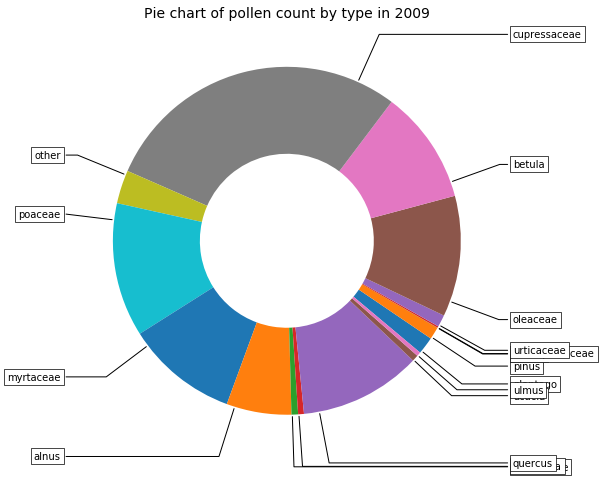

In [72]:
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(newlist1, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/8. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(type_list[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Pie chart of pollen count by type in 2009", fontsize=14)

plt.show()

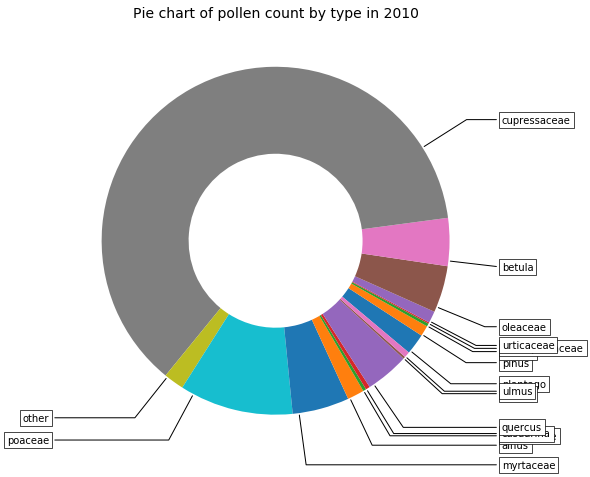

In [73]:
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(newlist2, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/9. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(type_list[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Pie chart of pollen count by type in 2010", fontsize=14)

plt.show()

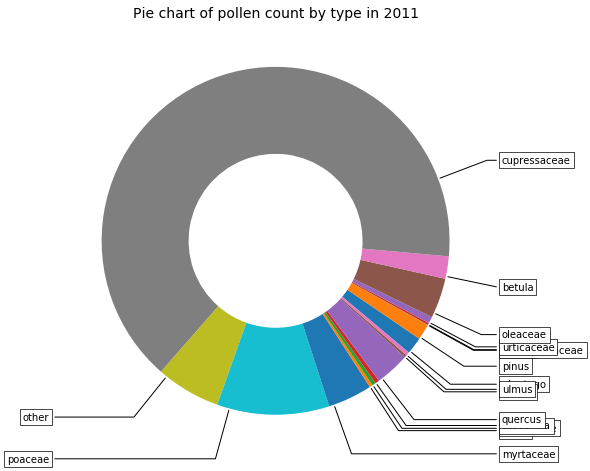

In [74]:
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(newlist3, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/9. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(type_list[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Pie chart of pollen count by type in 2011", fontsize=14)

plt.show()

# 4. Export csv files

In [24]:
#2009
pollen2009 = pd.DataFrame({"pollen_type": pollen_type, "pollen_count":y2009})
pollen2009.to_csv("2009_pollen.csv", index = False)

In [41]:
pollen2009

,pollen_type,pollen_count
0,string,number
1,plantago,229.5
2,pinus,163.2
3,rumex,1.7
4,chenopodiaceae,20.4
5,urticaceae,158.1
6,oleaceae,1592.9
7,betula,1496
8,cupressaceae,4071.5
9,other,440.3


In [25]:
#2010
pollen2010 = pd.DataFrame({"pollen_type": pollen_type, "pollen_count":y2010})
pollen2010.to_csv("2010_pollen.csv", index = False)

In [42]:
pollen2010

,pollen_type,pollen_count
0,string,number
1,plantago,785.4
2,pinus,399.5
3,rumex,112.2
4,chenopodiaceae,51
5,urticaceae,442
6,oleaceae,1761.2
7,betula,1802
8,cupressaceae,25109
9,other,765


In [26]:
#2011
pollen2011 = pd.DataFrame({"pollen_type": pollen_type, "pollen_count":y2011})
pollen2011.to_csv("2011_pollen.csv", index = False)

In [43]:
pollen2011

,pollen_type,pollen_count
0,string,number
1,plantago,576.3
2,pinus,532.1
3,rumex,11.9
4,chenopodiaceae,64.6
5,urticaceae,222.7
6,oleaceae,1344.7
7,betula,751.4
8,cupressaceae,23507.6
9,other,2169.2
